### Name : Heet Dhanuka
### Roll No.: 34
### Batch : B2
### DL PRACTICAL 5

In [9]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [18]:
# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


#End the timer and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3906 - loss: 14.8560 - val_accuracy: 0.5968 - val_loss: 4.8057
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5693 - loss: 3.1427 - val_accuracy: 0.5000 - val_loss: 1.2477
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5609 - loss: 1.3770 - val_accuracy: 0.5323 - val_loss: 0.8627
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5869 - loss: 0.8349 - val_accuracy: 0.5323 - val_loss: 0.7082
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6401 - loss: 0.7153 - val_accuracy: 0.6452 - val_loss: 0.6477
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5640 - loss: 0.7751 - val_accuracy: 0.6452 - val_loss: 0.5770
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6648 - loss: 0.6940 - val_accuracy: 0.5968 - val_loss: 0.7922
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6379 - loss: 0.6935 - val_accuracy: 0.5968 - val_los

In [22]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy: 0.6688
Precision: 0.5345
Recall: 0.5636
F1 Score: 0.5487
ROC AUC: 0.6944


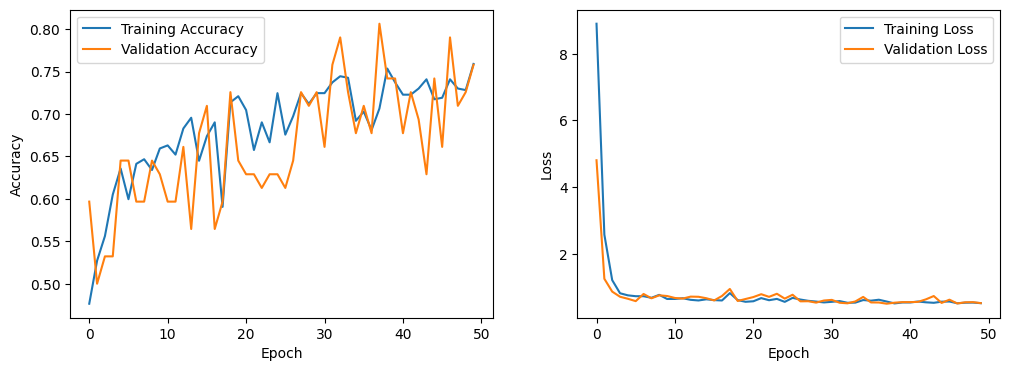

In [23]:
# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5678 - loss: 7.0666 - val_accuracy: 0.5000 - val_loss: 4.9398
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5812 - loss: 4.3621 - val_accuracy: 0.6452 - val_loss: 3.9102
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5853 - loss: 4.0060 - val_accuracy: 0.6774 - val_loss: 3.5368
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6422 - loss: 3.3927 - val_accuracy: 0.7258 - val_loss: 3.2418
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6584 - loss: 3.2437 - val_accuracy: 0.6613 - val_loss: 3.1048
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6653 - loss: 3.0499 - val_accuracy: 0.6452 - val_loss: 2.9990
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6622 - loss: 2.9706 - val_accuracy: 0.7581 - val_loss: 2.7705
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6820 - loss: 2.8083 - val_accuracy: 0.6452 - val_loss

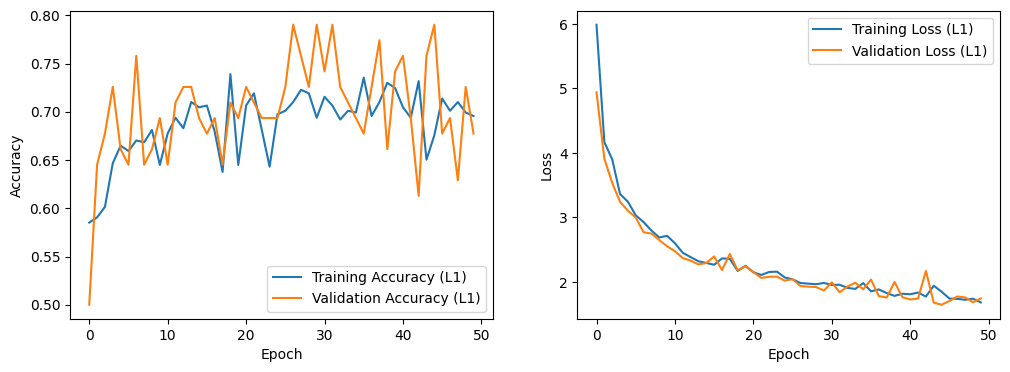

In [24]:
model_l1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
  tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time for model_l1: {elapsed_time:.2f} seconds")

y_pred_prob_l1 = model_l1.predict(X_test)
y_pred_l1 = (y_pred_prob_l1 > 0.5).astype(int)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1)
recall_l1 = recall_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)
roc_auc_l1 = roc_auc_score(y_test, y_pred_prob_l1)

print(f"Accuracy (L1): {accuracy_l1:.4f}")
print(f"Precision (L1): {precision_l1:.4f}")
print(f"Recall (L1): {recall_l1:.4f}")
print(f"F1 Score (L1): {f1_l1:.4f}")
print(f"ROC AUC (L1): {roc_auc_l1:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['accuracy'], label='Training Accuracy (L1)')
plt.plot(history_l1.history['val_accuracy'], label='Validation Accuracy (L1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_l1.history['loss'], label='Training Loss (L1)')
plt.plot(history_l1.history['val_loss'], label='Validation Loss (L1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6124 - loss: 1.2086 - val_accuracy: 0.6774 - val_loss: 1.1165
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7299 - loss: 1.0562 - val_accuracy: 0.6774 - val_loss: 1.0227
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7494 - loss: 0.9597 - val_accuracy: 0.6935 - val_loss: 0.9449
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7896 - loss: 0.8907 - val_accuracy: 0.6935 - val_loss: 0.8807
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8046 - loss: 0.8265 - val_accuracy: 0.6935 - val_loss: 0.8333
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7916 - loss: 0.7892 - val_accuracy: 0.7097 - val_loss: 0.7949
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7988 - loss: 0.7268 - val_accuracy: 0.7258 - val_loss: 0.7553
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7837 - loss: 0.7017 - val_accuracy: 0.7419 - val_loss

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy (L2): 0.7403
Precision (L2): 0.6364
Recall (L2): 0.6364
F1 Score (L2): 0.6364
ROC AUC (L2): 0.7943


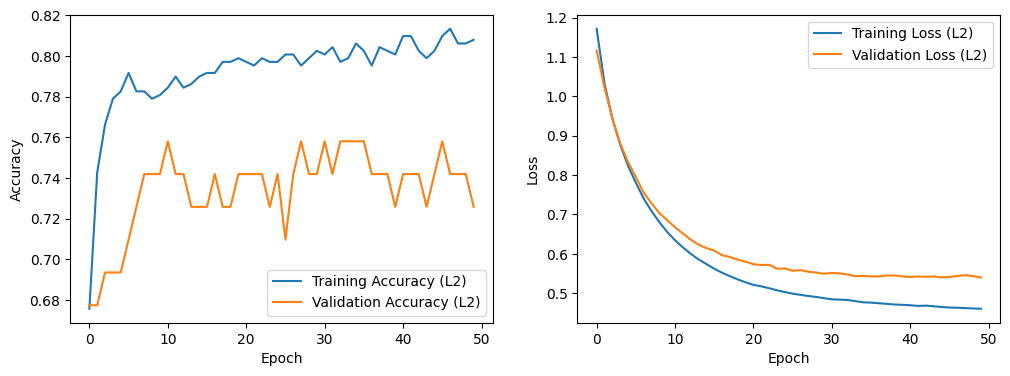

In [27]:
model_l2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time for model_l2: {elapsed_time:.2f} seconds")

y_pred_prob_l2 = model_l2.predict(X_test)
y_pred_l2 = (y_pred_prob_l2 > 0.5).astype(int)

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)
roc_auc_l2 = roc_auc_score(y_test, y_pred_prob_l2)

print(f"Accuracy (L2): {accuracy_l2:.4f}")
print(f"Precision (L2): {precision_l2:.4f}")
print(f"Recall (L2): {recall_l2:.4f}")
print(f"F1 Score (L2): {f1_l2:.4f}")
print(f"ROC AUC (L2): {roc_auc_l2:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy (L2)')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy (L2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss (L2)')
plt.plot(history_l2.history['val_loss'], label='Validation Loss (L2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5672 - loss: 0.6755 - val_accuracy: 0.7419 - val_loss: 0.6336
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7339 - loss: 0.5931 - val_accuracy: 0.7258 - val_loss: 0.5906
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7603 - loss: 0.5318 - val_accuracy: 0.7258 - val_loss: 0.5534
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7801 - loss: 0.4971 - val_accuracy: 0.7419 - val_loss: 0.5182
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7948 - loss: 0.4592 - val_accuracy: 0.7419 - val_loss: 0.5055
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7676 - loss: 0.4870 - val_accuracy: 0.7581 - val_loss: 0.4966
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8196 - loss: 0.4097 - val_accuracy: 0.7581 - val_loss: 0.4971
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7819 - loss: 0.4390 - val_accuracy: 0.725

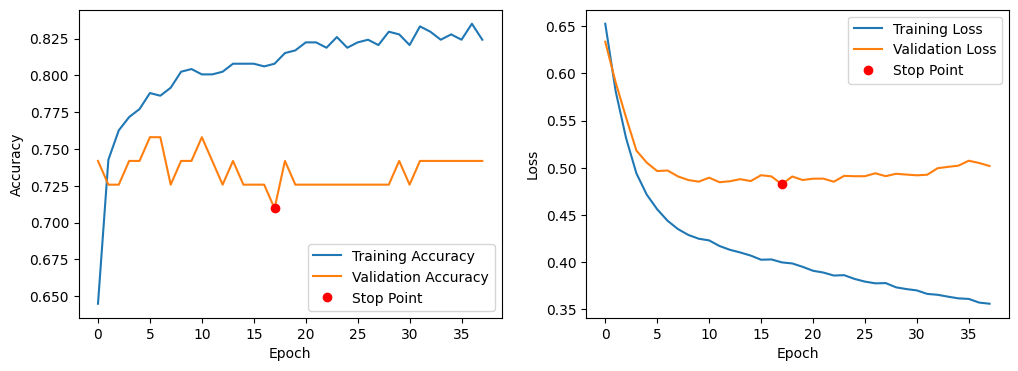

Epoch with minimum validation loss: 17


In [30]:
# Early Stopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True # Restore the best weights
)

model_es = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_es.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_es = model_es.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1, callbacks=[callback])

# Find the epoch with the minimum validation loss
min_val_loss_epoch = np.argmin(history_es.history['val_loss'])

#Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_es.history['accuracy'], label='Training Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Validation Accuracy')
plt.plot(min_val_loss_epoch, history_es.history['val_accuracy'][min_val_loss_epoch], 'ro', label='Stop Point') # Plot Stop Point
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_es.history['loss'], label='Training Loss')
plt.plot(history_es.history['val_loss'], label='Validation Loss')
plt.plot(min_val_loss_epoch, history_es.history['val_loss'][min_val_loss_epoch], 'ro', label='Stop Point') # Plot Stop Point
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Epoch with minimum validation loss: {min_val_loss_epoch}")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6796 - loss: 0.6513 - val_accuracy: 0.6935 - val_loss: 0.5988
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7127 - loss: 0.5980 - val_accuracy: 0.7419 - val_loss: 0.5650
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7327 - loss: 0.5724 - val_accuracy: 0.7258 - val_loss: 0.5376
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7508 - loss: 0.5202 - val_accuracy: 0.7258 - val_loss: 0.5309
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7410 - loss: 0.5114 - val_accuracy: 0.6935 - val_loss: 0.5254
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7668 - loss: 0.5094 - val_accuracy: 0.6774 - val_loss: 0.5110
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7618 - loss: 0.5137 - val_accuracy: 0.7258 - val_loss: 0.5041
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7681 - loss: 0.5034 - val_accuracy: 0.7258 - val_loss

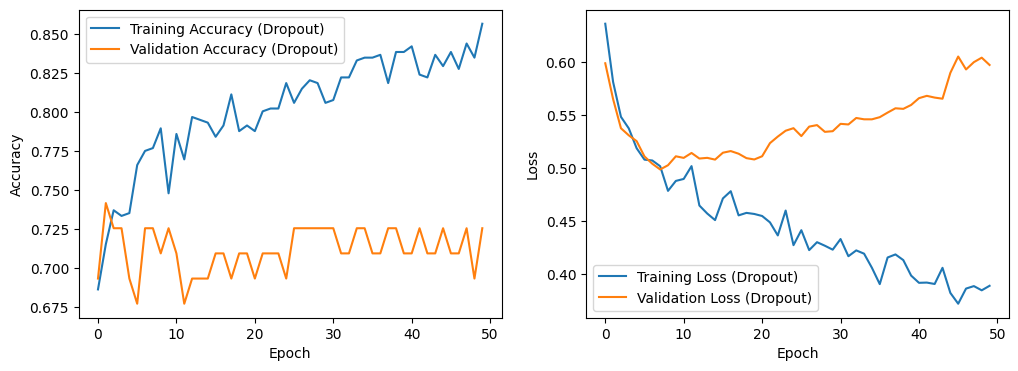

In [31]:
# Dropout
model_d = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.4), # Add dropout layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_d = model_d.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time for model_d: {elapsed_time:.2f} seconds")

y_pred_prob_d = model_d.predict(X_test)
y_pred_d = (y_pred_prob_d > 0.5).astype(int)

accuracy_d = accuracy_score(y_test, y_pred_d)
precision_d = precision_score(y_test, y_pred_d)
recall_d = recall_score(y_test, y_pred_d)
f1_d = f1_score(y_test, y_pred_d)
roc_auc_d = roc_auc_score(y_test, y_pred_prob_d)

print(f"Accuracy (Dropout): {accuracy_d:.4f}")
print(f"Precision (Dropout): {precision_d:.4f}")
print(f"Recall (Dropout): {recall_d:.4f}")
print(f"F1 Score (Dropout): {f1_d:.4f}")
print(f"ROC AUC (Dropout): {roc_auc_d:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_d.history['accuracy'], label='Training Accuracy (Dropout)')
plt.plot(history_d.history['val_accuracy'], label='Validation Accuracy (Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_d.history['loss'], label='Training Loss (Dropout)')
plt.plot(history_d.history['val_loss'], label='Validation Loss (Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [41]:
# Saving the model
tf.keras.models.save_model(model, 'my_model.keras')